# IMPORTING THE LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.neighbors import KNeighborsClassifier

# LOADING THE DATA

In [4]:
titanic = pd.read_csv('titanic_data.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EXPLORING THE DATA

In [7]:
#checking for the number of people that survived
print('Total number of passengers in the Training data...', len(titanic))
print('Number of passengers in the Training data that survived...',len(titanic[titanic['Survived'] ==1]))

Total number of passengers in the Training data... 891
Number of passengers in the Training data that survived... 342


In [8]:
#checking to see the percentage of men and who that survived
print('Percentage of Men that survived', 100*np.mean(titanic['Survived'][titanic['Sex'] =='male']))
print('Percentage of Women that survived',100*np.mean(titanic['Survived'][titanic['Sex'] =='female']))

Percentage of Men that survived 18.890814558058924
Percentage of Women that survived 74.20382165605095


In [9]:
#checking to see the percentage of people that survived based on the class they paid for
print('Percentage of people that survived in first class ', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 1]))
print('Percentage of people that survived in second class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 2]))
print('Percentage of people that survived in third class ', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 3]))

Percentage of people that survived in first class  62.96296296296296
Percentage of people that survived in second class 47.28260869565217
Percentage of people that survived in third class  24.236252545824847


In [10]:
#checking the impact of the age on survival rate
print('Percent of Children that survived', 100*np.mean(titanic['Survived'][titanic['Age'] <18]))
print('Percent of Adults that survived  ', 100*np.mean(titanic['Survived'][titanic['Age'] >18]))

Percent of Children that survived 53.98230088495575
Percent of Adults that survived   38.26086956521739


# DATA PRE-PROCESSING

# Changing the Non-Numeric Features to Numeric

In [13]:
#changing the non-numeric features to numeric
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


# Checking for missing values

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Filling the missing values

In [18]:
#filling the missing values in age with the mean value since its a numerical data
titanic['Age'] = titanic['Age'].fillna(np.mean(titanic['Age']))

In [19]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
#filling the missing values in Embarked with the mode since it is a Categorical data
titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
#finding the mode of the Embarked column
print(titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [22]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Dropping irrelevant columns

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [25]:
cols = ['Name', 'Ticket', 'Cabin','Embarked']
titanic = titanic.drop(cols, axis=1)

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


# DATA ANALYSIS

In [28]:
#getting the statistical measure of the data
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
#checking the number of people that survived and did not survive
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Separating the feature variable (X) and the Target variable(y)

In [31]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [32]:
print(X)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare
0              1       3    1  22.000000      1      0   7.2500
1              2       1    0  38.000000      1      0  71.2833
2              3       3    0  26.000000      0      0   7.9250
3              4       1    0  35.000000      1      0  53.1000
4              5       3    1  35.000000      0      0   8.0500
..           ...     ...  ...        ...    ...    ...      ...
886          887       2    1  27.000000      0      0  13.0000
887          888       1    0  19.000000      0      0  30.0000
888          889       3    0  29.699118      1      2  23.4500
889          890       1    1  26.000000      0      0  30.0000
890          891       3    1  32.000000      0      0   7.7500

[891 rows x 7 columns]


In [33]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# SPLITTING THE DATA INTO TRAINING DATA AND TESTING DATA

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [37]:
len(X_train)

712

In [38]:
len(X_test)

179

In [39]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
717,718,2,0,27.000000,0,0,10.5000
185,186,1,1,29.699118,0,0,50.0000
122,123,2,1,32.500000,1,0,30.0708
24,25,3,0,8.000000,3,1,21.0750
93,94,3,1,26.000000,1,2,20.5750
...,...,...,...,...,...,...,...
337,338,1,0,41.000000,0,0,134.5000
511,512,3,1,29.699118,0,0,8.0500
398,399,2,1,23.000000,0,0,10.5000
377,378,1,1,27.000000,0,2,211.5000


In [40]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
519,520,3,1,32.000000,0,0,7.8958
882,883,3,0,22.000000,0,0,10.5167
85,86,3,0,33.000000,3,0,15.8500
776,777,3,1,29.699118,0,0,7.7500
282,283,3,1,16.000000,0,0,9.5000
...,...,...,...,...,...,...,...
150,151,2,1,51.000000,0,0,12.5250
326,327,3,1,61.000000,0,0,6.2375
819,820,3,1,10.000000,3,2,27.9000
502,503,3,0,29.699118,0,0,7.6292


# Buiding Machine Learning model

# 1. using decision tree classifier

In [43]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# evaluate the model

In [45]:
print('accuracy score of train data...', accuracy_score(y_train, model.predict(X_train)))
print('accuracy score of test data ...', accuracy_score(y_test, model.predict(X_test)))

accuracy score of train data... 1.0
accuracy score of test data ... 0.7877094972067039


The large difference between the training score and the validation score implies that our model overfits.

# improve the model

In [48]:
model_improved = DecisionTreeClassifier(max_depth = 3)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
print('accuracy score of train data...' , accuracy_score(y_train, model_improved.predict(X_train)))
print('accuracy score of test data ...', accuracy_score(y_test, model_improved.predict(X_test)))

accuracy score of train data... 0.8314606741573034
accuracy score of test data ... 0.8044692737430168


# 2. using logistic regression

In [51]:
model = LogisticRegression(max_iter=10000)

In [52]:
# training the Logistic Regression model with training data
model.fit(X_train, y_train) 

LogisticRegression(max_iter=10000)

# model evaluation and accuracy score

In [54]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [55]:
print(X_train_prediction)

[1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1
 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 1 0 0 1 

In [56]:
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8019662921348315


In [57]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [58]:
print(X_test_prediction)

[0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0
 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0]


In [59]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7877094972067039


# 3. using random forest model

# model evaluation

In [62]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8547486033519553


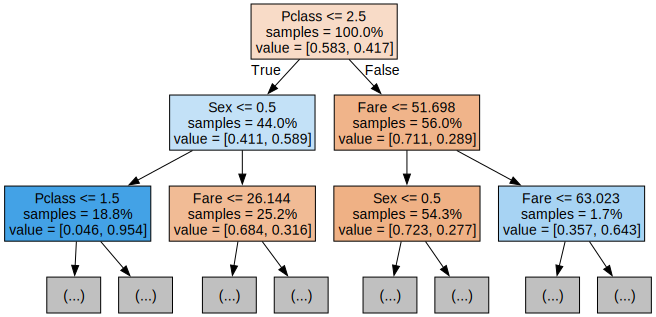

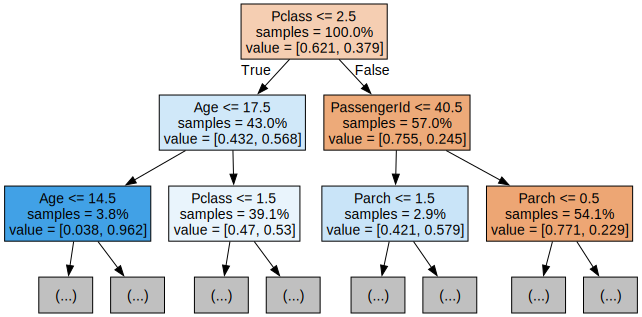

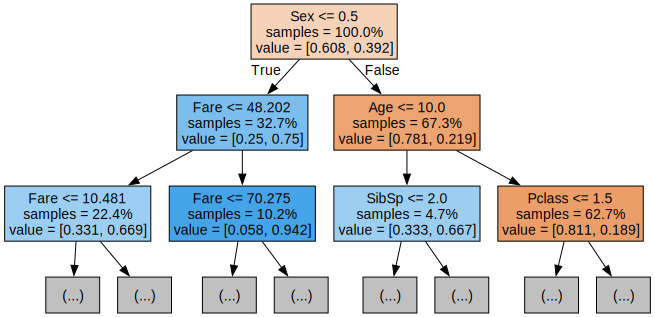

In [64]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# hyper parameter tunning

In [66]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F914542D20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F9145A7DD0>})

In [67]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 203}


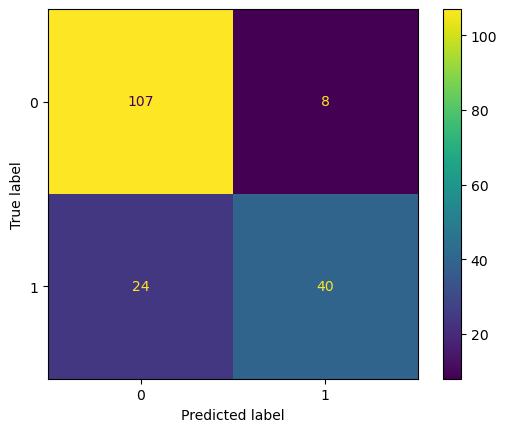

In [68]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# 4. using K-Nearest Neighbors(K-NN)

In [70]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [71]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6983240223463687


# hyperparameter tunning the K parameter

In [73]:
train_score = {}
test_score = {}
n_neighbors = np.arange(1,31)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)

# plotting the Train score and the Test Score

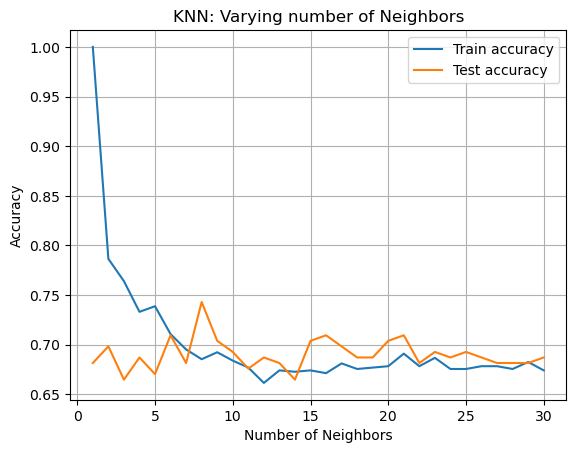

In [75]:
plt.plot(n_neighbors, train_score.values(), label='Train accuracy')
plt.plot(n_neighbors, test_score.values(), label='Test accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Varying number of Neighbors')
plt.legend()
plt.grid()
plt.show()

# finding the best k parameter

In [77]:
for key, value in test_score.items():
    if value ==max(test_score.values()):
        print(key)

8


In [78]:
#the K Neighbors with the best Test score is 2

# using Gridsearch to determine the best parameters for n-neighbors

In [80]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [81]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 29}


# using the best parameter to train the model and predict

In [83]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy_score=accuracy_score(y_test, y_pred)*100
print("Accuracy for testing dataset after tuning : {:.2f}%".format(accuracy_score))

Accuracy for testing dataset after tuning : 70.39%
